<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/5_%EC%9D%98%EB%AF%B8_%EC%97%B0%EA%B2%B0%EB%A7%9D_%EB%B6%84%EC%84%9D(Semantic_Network_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 의미 연결망 분석(Semantic Network Analysis)
- 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를 연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
- 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며 주로 친구 관계, 전력 공급 등을 분석하는데 사용
- 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
- 의미 연경망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주하고 이 연결 관계들을 분석한다.

### n-gram
- `nltk`라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
- 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk import word_tokenize, bigrams

sentence = 'I lovae data science and deep learning'
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

[('I', 'lovae'), ('lovae', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [3]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'lovae', 'data'), ('lovae', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'lovae', 'data', 'science'), ('lovae', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


### 어휘 동시 출현 빈도의 계수화
- 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
- 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있다.
- 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 활률 등으로 계수화 가능
  - 예를 들어 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정
- 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있다.
- `nltk`에서 제공하는 `ConditionalFreqDist` 메소드를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능하다

In [6]:
from nltk import ConditionalFreqDist

sentences = ['I love data science and deep learning', 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
    token += ([x for x in i])

cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [7]:
print(cfd['I'])

<FreqDist with 2 samples and 3 outcomes>


In [8]:
# I와 Love가 동시 출현한 빈도
print(cfd['I']['love'])

2


In [11]:
# I와 동시 출현 빈도가 높은 단어
print(cfd['I'].most_common(1))

[('love', 2)]


In [14]:
import numpy as np

freq_matrix = []

for i in cfd.keys():
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)

freq_matrix = np.array(freq_matrix)
print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


In [16]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


- 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
- `networkx` 라이브러리를 사용해 해당 행렬을 그래프로 시각화
  - 앞서 만든 데이터프레임을 그래프로 변환
  - 넘파이 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야함

In [17]:
import networkx as nx

G = nx.from_pandas_adjacency(df)
print(G.nodes())
print(G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


- 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [19]:
print(G.edges()['I', 'love'])
print(G.edges()['I', 'know'])

{'weight': 2}
{'weight': 1}


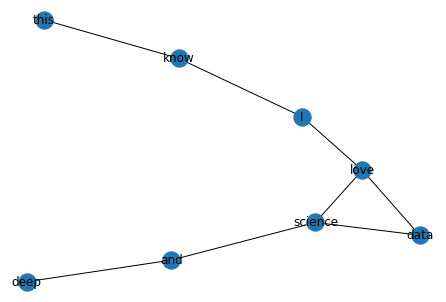

In [23]:
nx.draw(G, with_labels=True)

- 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
- 어휘 동신 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용

In [25]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [27]:
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [28]:
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


- 확률 행렬도 인접 행렬로 간주할 수 있음
- 그래프 시각화 시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있음

In [29]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [31]:
print(prob_G.edges()['I', 'love'])
print(prob_G.edges()['I', 'know'])

{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


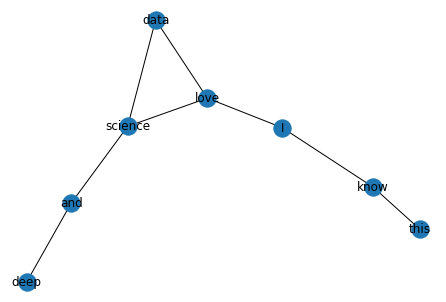

In [32]:
nx.draw(prob_G, with_labels=True)